In [1]:

from datetime import datetime

import torch
from torch.utils.data import DataLoader

from datasets.LabeledImageDataset import LabeledImageDataset
from models.resnet import Resnet50Model, Resnet18Model
from train import train_classifier
from utils import plot_model_metrics, oversample_dataset
from utils import reduce_dataset, split_dataset, undersample_dataset
from torchvision.transforms import v2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 256
dataset = LabeledImageDataset("data/candidates")
dataset = reduce_dataset(dataset, discard_ratio=0.0)
train_dataset, test_dataset = split_dataset(dataset, train_ratio=0.7)
train_dataset = undersample_dataset(train_dataset)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=True, )

model = Resnet18Model(hidden_layers=2, units_per_layer=2048, dropout=0.4,focal_alpha=0.02)

print(f"Dataset: {len(train_dataset):,} training, {len(test_dataset):,} testing")


Device: cuda:0
Dataset: 2,112 training, 6,069 testing


In [2]:
print(model)

Resnet18Model(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [3]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2024-12-18T13:18:59.275542


In [4]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        learning_rate=0.0001,
                                        max_epochs=100,
                                        checkpoint_every=1,
                                        eval_every=1)


Epoch 1 training: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


Train: 1/100: loss:0.0031279663348363507


Epoch 1 testing: 100%|██████████| 24/24 [00:14<00:00,  1.66it/s]


Test: 1/100: loss:0.0026992020333030573, accuracy:0.7583421457757827, precision:0.21421360925415436, recall:0.8431137283644351, f1:0.3405001982760563, mcc:0.34257682940172246, epoch:0


Epoch 2 training: 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]


Train: 2/100: loss:0.0023284274308631816


Epoch 2 testing: 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]


Test: 2/100: loss:0.0021188006163962805, accuracy:0.804077822859116, precision:0.25542897973647205, recall:0.8440800213760676, f1:0.3886556472661009, mcc:0.3911230313990776, epoch:1


Epoch 3 training: 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]


Train: 3/100: loss:0.0019125160631827181


Epoch 3 testing: 100%|██████████| 24/24 [00:13<00:00,  1.73it/s]


Test: 3/100: loss:0.0015441105594315256, accuracy:0.8731233094498158, precision:0.33966992892766057, recall:0.7480230078637081, f1:0.46280910939522313, mcc:0.44529682231330575, epoch:2


Epoch 4 training: 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]


Train: 4/100: loss:0.002000076566926307


Epoch 4 testing: 100%|██████████| 24/24 [00:13<00:00,  1.72it/s]


Test: 4/100: loss:0.0020693267142632976, accuracy:0.829277811348987, precision:0.28480846534270315, recall:0.8474221100863734, f1:0.4250672429683098, mcc:0.42661385205211233, epoch:3


Epoch 5 training: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]


Train: 5/100: loss:0.0018025015532556507


Epoch 5 testing: 100%|██████████| 24/24 [00:14<00:00,  1.71it/s]


Test: 5/100: loss:0.0018474775570211932, accuracy:0.841115259553407, precision:0.298921588325394, recall:0.8419850380677039, f1:0.4385033620324232, mcc:0.4388425939297993, epoch:4


Epoch 6 training: 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]


Train: 6/100: loss:0.0017443683981481525


Epoch 6 testing: 100%|██████████| 24/24 [00:13<00:00,  1.72it/s]


Test: 6/100: loss:0.0017073083290597424, accuracy:0.8530920882251382, precision:0.31461259178913425, recall:0.8245845250953611, f1:0.452979310511616, mcc:0.4489613674356363, epoch:5


Epoch 7 training: 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]


Train: 7/100: loss:0.0017917884073944555


Epoch 7 testing: 100%|██████████| 24/24 [00:14<00:00,  1.70it/s]


Test: 7/100: loss:0.0015400115759499993, accuracy:0.8681568686694291, precision:0.33694603361184017, recall:0.7882366345638095, f1:0.46773552591905415, mcc:0.45676697311493913, epoch:6


Epoch 8 training: 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]


Train: 8/100: loss:0.0017604980514281327


Epoch 8 testing: 100%|██████████| 24/24 [00:14<00:00,  1.68it/s]


Test: 8/100: loss:0.0015105943214924384, accuracy:0.8682962491367404, precision:0.3334992725574575, recall:0.7645530062491463, f1:0.4601211931388976, mcc:0.4459091119308305, epoch:7


Epoch 9 training: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]


Train: 9/100: loss:0.0016516083851456642


Epoch 9 testing: 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]


Test: 9/100: loss:0.0019465700218764443, accuracy:0.829019732677256, precision:0.28601435439842054, recall:0.8704152295255397, f1:0.427933237116499, mcc:0.43470242537889686, epoch:8


Epoch 10 training: 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]


Train: 10/100: loss:0.001688700479765733


Epoch 10 testing: 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]


Test: 10/100: loss:0.002959188820871835, accuracy:0.7503830714779006, precision:0.2228181315578431, recall:0.9440274603791311, f1:0.35875310527629783, mcc:0.38201775760683127, epoch:9


Epoch 11 training: 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


Train: 11/100: loss:0.0015190551186808282


Epoch 11 testing: 100%|██████████| 24/24 [00:14<00:00,  1.71it/s]


Test: 11/100: loss:0.0025009377762520066, accuracy:0.783042163040976, precision:0.24632084508623217, recall:0.9246085261233526, f1:0.38754607467556096, mcc:0.4064917411912445, epoch:10


Epoch 12 training: 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]


Train: 12/100: loss:0.0014721092949103978


Epoch 12 testing: 100%|██████████| 24/24 [00:14<00:00,  1.70it/s]


Test: 12/100: loss:0.002234702386582891, accuracy:0.8082934075736649, precision:0.2661522976037552, recall:0.8964811278788458, f1:0.4083561986530569, mcc:0.4210252321162982, epoch:11


Epoch 13 training: 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]


Train: 13/100: loss:0.0014271710921699803


Epoch 13 testing: 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]


Test: 13/100: loss:0.0025659307138994336, accuracy:0.7943796400207183, precision:0.2521293938517704, recall:0.9048909815079975, f1:0.3916920271450582, mcc:0.4071809622562319, epoch:12


Epoch 14 training: 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]


Train: 14/100: loss:0.001381727582257655


Epoch 14 testing: 100%|██████████| 24/24 [00:14<00:00,  1.66it/s]


Test: 14/100: loss:0.0016592075601996232, accuracy:0.8614603116367404, precision:0.3266361791894828, recall:0.802487705218347, f1:0.46113498771259503, mcc:0.4525933908323627, epoch:13


Epoch 15 training: 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]


Train: 15/100: loss:0.0014424207102921274


Epoch 15 testing: 100%|██████████| 24/24 [00:14<00:00,  1.65it/s]


Test: 15/100: loss:0.0019563468473885828, accuracy:0.8441798313766115, precision:0.305288481643311, recall:0.8545813570465693, f1:0.4454918094784784, mcc:0.44876783818519606, epoch:14


Epoch 16 training: 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]


Train: 16/100: loss:0.0014283473008415764


Epoch 16 testing: 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]


Test: 16/100: loss:0.002176966421150913, accuracy:0.8227440147329649, precision:0.2785570119691168, recall:0.8807679613468863, f1:0.4201773807179407, mcc:0.4299416760601809, epoch:15


Epoch 17 training: 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


Train: 17/100: loss:0.0013426990610443884


Epoch 17 testing: 100%|██████████| 24/24 [00:14<00:00,  1.67it/s]


Test: 17/100: loss:0.002023082342930138, accuracy:0.8324448952578268, precision:0.2892187359687774, recall:0.8627563105185289, f1:0.4299865856878052, mcc:0.4355398450203863, epoch:16


Epoch 18 training: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]


Train: 18/100: loss:0.0013185192623900042


Epoch 18 testing: 100%|██████████| 24/24 [00:14<00:00,  1.68it/s]


Test: 18/100: loss:0.002263847602686534, accuracy:0.8166382510359117, precision:0.2705242116213263, recall:0.8705304613973345, f1:0.4106557445871816, mcc:0.4184851946925508, epoch:17


Epoch 19 training: 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]


Train: 19/100: loss:0.0012749501685094503


Epoch 19 testing: 100%|██████████| 24/24 [00:14<00:00,  1.66it/s]


Test: 19/100: loss:0.0023364876590979597, accuracy:0.819512186348987, precision:0.27789831932100123, recall:0.8760276298850215, f1:0.4198330023174421, mcc:0.4276678377944918, epoch:18


Epoch 20 training: 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]


Train: 20/100: loss:0.0012378072909389932


Epoch 20 testing: 100%|██████████| 24/24 [00:14<00:00,  1.65it/s]


Test: 20/100: loss:0.002496410432892541, accuracy:0.8100046400207183, precision:0.26560254091188007, recall:0.8900551876933172, f1:0.4059185706648128, mcc:0.41832650757215323, epoch:19


Epoch 21 training: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]


Train: 21/100: loss:0.0012821780724657907


Epoch 21 testing: 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Test: 21/100: loss:0.0022853294746406996, accuracy:0.8263715037983426, precision:0.28363254403555466, recall:0.869143524604051, f1:0.4252902198137047, mcc:0.43161114784929167, epoch:20


Epoch 22 training: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]


Train: 22/100: loss:0.0011627739230688247


Epoch 22 testing: 100%|██████████| 24/24 [00:14<00:00,  1.66it/s]


Test: 22/100: loss:0.00172353170637507, accuracy:0.8633855605432781, precision:0.3252488266178714, recall:0.7826148162721053, f1:0.4561410034409405, mcc:0.44483610789550787, epoch:21


Epoch 23 training: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]


Train: 23/100: loss:0.0012916036325299905


Epoch 23 testing: 100%|██████████| 24/24 [00:14<00:00,  1.62it/s]


Test: 23/100: loss:0.0030589509018075964, accuracy:0.7790684708793738, precision:0.24051967700054333, recall:0.9138043823035074, f1:0.3777474333798056, mcc:0.39524093716950176, epoch:22


Epoch 24 training: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


Train: 24/100: loss:0.0011015671706344518


Epoch 24 testing: 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Test: 24/100: loss:0.0024349992017960176, accuracy:0.8193377359576427, precision:0.27524129760047567, recall:0.8754709985505263, f1:0.4159613303156455, mcc:0.42408269918067226, epoch:23


Epoch 25 training: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


Train: 25/100: loss:0.0010138136050146488


Epoch 25 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 25/100: loss:0.0018770302510044228, accuracy:0.8589793393186004, precision:0.320050347859928, recall:0.7901578247435698, f1:0.45274487145895986, mcc:0.44246623410304875, epoch:24


Epoch 26 training: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]


Train: 26/100: loss:0.0010673149243100649


Epoch 26 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 26/100: loss:0.002115444469382055, accuracy:0.8428498719498158, precision:0.2987753634554532, recall:0.8165579867294316, f1:0.43439053765284763, mcc:0.4305029649123746, epoch:25


Epoch 27 training: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


Train: 27/100: loss:0.0009768810575931436


Epoch 27 testing: 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Test: 27/100: loss:0.0028684424663273, accuracy:0.8043359015308472, precision:0.2604278073501471, recall:0.8843937729351733, f1:0.40067223064035434, mcc:0.4109671006839634, epoch:26


Epoch 28 training: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


Train: 28/100: loss:0.0008994775578483111


Epoch 28 testing: 100%|██████████| 24/24 [00:14<00:00,  1.62it/s]


Test: 28/100: loss:0.0033281838113907725, accuracy:0.7909221052025783, precision:0.24833081539815674, recall:0.9034102638662996, f1:0.3865472911151651, mcc:0.4020579831927651, epoch:27


Epoch 29 training: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]


Train: 29/100: loss:0.0009187956263000766


Epoch 29 testing: 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]


Test: 29/100: loss:0.004935984169909109, accuracy:0.7294148538213628, precision:0.20830720861885074, recall:0.9416347009903293, f1:0.33937238534451425, mcc:0.3612391555572089, epoch:28


Epoch 30 training: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


Train: 30/100: loss:0.0010395396061034666


Epoch 30 testing: 100%|██████████| 24/24 [00:14<00:00,  1.62it/s]


Test: 30/100: loss:0.005531343495628486, accuracy:0.6991459124654696, precision:0.19240351434596029, recall:0.9496330960998565, f1:0.31717763702020757, mcc:0.34009320370990187, epoch:29


Epoch 31 training: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


Train: 31/100: loss:0.0009499383870408767


Epoch 31 testing: 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]


Test: 31/100: loss:0.004219006455969065, accuracy:0.7507085923112339, precision:0.22156706863737463, recall:0.9274306233368691, f1:0.3567470700581851, mcc:0.3759447144819779, epoch:30


Epoch 32 training: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


Train: 32/100: loss:0.0008034743239275283


Epoch 32 testing: 100%|██████████| 24/24 [00:15<00:00,  1.60it/s]


Test: 32/100: loss:0.0035774108255282044, accuracy:0.7833838699930938, precision:0.24403228656885181, recall:0.9154304128898203, f1:0.3833988816296072, mcc:0.4008217038151077, epoch:31


Epoch 33 training: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


Train: 33/100: loss:0.0006974330948044857


Epoch 33 testing: 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]


Test: 33/100: loss:0.0032038381517243883, accuracy:0.8093257222605894, precision:0.2652223028664101, recall:0.8800544252695451, f1:0.40605125896803657, mcc:0.41564000420282393, epoch:32


Epoch 34 training: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


Train: 34/100: loss:0.0006280888919718564


Epoch 34 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 34/100: loss:0.0031989538207805404, accuracy:0.8172380366597606, precision:0.27085563115504724, recall:0.8581522161953018, f1:0.40703181781261105, mcc:0.41305775878581413, epoch:33


Epoch 35 training: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]


Train: 35/100: loss:0.000616414672953801


Epoch 35 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 35/100: loss:0.0038347866017526635, accuracy:0.7966465958793738, precision:0.251637778660952, recall:0.8849819862155389, f1:0.38892814869476783, mcc:0.4001824005052532, epoch:34


Epoch 36 training: 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]


Train: 36/100: loss:0.0006414145852128664


Epoch 36 testing: 100%|██████████| 24/24 [00:14<00:00,  1.62it/s]


Test: 36/100: loss:0.002314312465993377, accuracy:0.8700308615331491, precision:0.3369816762208611, recall:0.7502545095174066, f1:0.45949167670754987, mcc:0.44303946063964644, epoch:35


Epoch 37 training: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]


Train: 37/100: loss:0.000720784385015981


Epoch 37 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 37/100: loss:0.0019940307684009895, accuracy:0.8869858209599447, precision:0.3666501961046935, recall:0.7158012213492636, f1:0.4811865828613719, mcc:0.4574911928233414, epoch:36


Epoch 38 training: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]


Train: 38/100: loss:0.0007399253113867922


Epoch 38 testing: 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Test: 38/100: loss:0.0023773636057740077, accuracy:0.8609720303867404, precision:0.31882917065946303, recall:0.7760098396687126, f1:0.4456956529511474, mcc:0.43529482357822785, epoch:37


Epoch 39 training: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


Train: 39/100: loss:0.0006718973551566402


Epoch 39 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 39/100: loss:0.002406127042680358, accuracy:0.8571449125230203, precision:0.3180387269445148, recall:0.7779148014815234, f1:0.4473925919177318, mcc:0.43521014018357, epoch:38


Epoch 40 training: 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]


Train: 40/100: loss:0.0005256245947546429


Epoch 40 testing: 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]


Test: 40/100: loss:0.001790156398783438, accuracy:0.8925826211441068, precision:0.3832413827720467, recall:0.7076366366572121, f1:0.48982906947104166, mcc:0.46563914362991093, epoch:39


Epoch 41 training: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


Train: 41/100: loss:0.0005701198598318216


Epoch 41 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 41/100: loss:0.0021089647489134222, accuracy:0.8776806011164825, precision:0.3527503002969383, recall:0.740699391828203, f1:0.4732803990458798, mcc:0.45361415468142, epoch:40


Epoch 42 training: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


Train: 42/100: loss:0.000389945664210245


Epoch 42 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 42/100: loss:0.0028304925751096257, accuracy:0.8475465440837938, precision:0.30438458358552517, recall:0.8168136187739264, f1:0.44051636466047817, mcc:0.436216560977052, epoch:41


Epoch 43 training: 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]


Train: 43/100: loss:0.000365039881823274


Epoch 43 testing: 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]


Test: 43/100: loss:0.0032069751080901674, accuracy:0.8403293335635359, precision:0.29601388143827434, recall:0.8298063667153132, f1:0.4332612091288501, mcc:0.43186050571820983, epoch:42


Epoch 44 training: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


Train: 44/100: loss:0.00030639234723316296


Epoch 44 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 44/100: loss:0.002855221333447844, accuracy:0.8590072154120626, precision:0.3158699085831602, recall:0.7789972283988975, f1:0.44487358606685823, mcc:0.4340695023153729, epoch:43


Epoch 45 training: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


Train: 45/100: loss:0.00022371884066766748


Epoch 45 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 45/100: loss:0.0037074648619939885, accuracy:0.8365858439802025, precision:0.2905512568753989, recall:0.8150777457456518, f1:0.42476974359430536, mcc:0.4207598450910443, epoch:44


Epoch 46 training: 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]


Train: 46/100: loss:0.00025023201467572816


Epoch 46 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 46/100: loss:0.004395861101026337, accuracy:0.8243509366367404, precision:0.27862078900823706, recall:0.8436677406860418, f1:0.41663134706818045, mcc:0.4176748877047291, epoch:45


Epoch 47 training: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


Train: 47/100: loss:0.00021139396186400618


Epoch 47 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 47/100: loss:0.004838068979249026, accuracy:0.8186471282228361, precision:0.26961278391675, recall:0.848938322589975, f1:0.4057873948879842, mcc:0.4096445015189929, epoch:46


Epoch 48 training: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


Train: 48/100: loss:0.00022561701027572982


Epoch 48 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 48/100: loss:0.0056403870694339275, accuracy:0.8030176320787293, precision:0.2592132245740106, recall:0.876983125159192, f1:0.3979715263122304, mcc:0.4064938604782023, epoch:47


Epoch 49 training: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


Train: 49/100: loss:0.000164888330295475


Epoch 49 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 49/100: loss:0.004708246318235372, accuracy:0.829059298745396, precision:0.2780736307090172, recall:0.8186928509442054, f1:0.41239133792915794, mcc:0.4102469712045996, epoch:48


Epoch 50 training: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


Train: 50/100: loss:0.0001821647060246


Epoch 50 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 50/100: loss:0.003741845634067431, accuracy:0.8616392581721914, precision:0.3295372300309242, recall:0.8054393779897997, f1:0.4619766692826417, mcc:0.4547718992458303, epoch:49


Epoch 51 training: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


Train: 51/100: loss:0.00021546499758389674


Epoch 51 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 51/100: loss:0.0033959813493614397, accuracy:0.8740998719498158, precision:0.34481632409450413, recall:0.7502574234041709, f1:0.4687715107816461, mcc:0.45071182259174253, epoch:50


Epoch 52 training: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]


Train: 52/100: loss:0.0002069411744337736


Epoch 52 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 52/100: loss:0.004329232353484258, accuracy:0.8433102771063536, precision:0.29752057238690593, recall:0.8058008172079155, f1:0.4302163588983447, mcc:0.42478201078978844, epoch:51


Epoch 53 training: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]


Train: 53/100: loss:0.00015333136656813117


Epoch 53 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 53/100: loss:0.003703027051718285, accuracy:0.8636040731468692, precision:0.32437504451940635, recall:0.7657028977739762, f1:0.4501120404742425, mcc:0.4365693045326946, epoch:52


Epoch 54 training: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]


Train: 54/100: loss:0.00017539928214521043


Epoch 54 testing: 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Test: 54/100: loss:0.003838140604784712, accuracy:0.8606186334599447, precision:0.314479321031154, recall:0.7539116941040568, f1:0.4412751515068525, mcc:0.42566557934818233, epoch:53


Epoch 55 training: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


Train: 55/100: loss:0.00017303680134419765


Epoch 55 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 55/100: loss:0.004332097412164633, accuracy:0.8519923313766115, precision:0.3076352339155079, recall:0.7863746690482679, f1:0.437670414565076, mcc:0.4283214823691321, epoch:54


Epoch 56 training: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


Train: 56/100: loss:0.00010480914109696944


Epoch 56 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 56/100: loss:0.006584110068312536, accuracy:0.8000645646293738, precision:0.25427366720658195, recall:0.8651926951508405, f1:0.39056321621353923, mcc:0.3969891560449474, epoch:55


Epoch 57 training: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]


Train: 57/100: loss:0.00011361543551578911


Epoch 57 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 57/100: loss:0.005017321285170813, accuracy:0.8391063823664825, precision:0.2916707614178613, recall:0.8192107240836601, f1:0.4280398318015901, mcc:0.4245263827570119, epoch:56


Epoch 58 training: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


Train: 58/100: loss:0.00010439388400603396


Epoch 58 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 58/100: loss:0.00502680498175323, accuracy:0.8410918796040515, precision:0.2974503803392264, recall:0.8233727586915686, f1:0.4341769448785812, mcc:0.43092974210956186, epoch:57


Epoch 59 training: 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]


Train: 59/100: loss:0.00010688945541106578


Epoch 59 testing: 100%|██████████| 24/24 [00:15<00:00,  1.60it/s]


Test: 59/100: loss:0.004938789090374485, accuracy:0.8436915501266115, precision:0.2984464188454082, recall:0.8173851525842877, f1:0.43388359976767266, mcc:0.429814683961471, epoch:58


Epoch 60 training: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


Train: 60/100: loss:8.154375811702468e-05


Epoch 60 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 60/100: loss:0.005255275512657438, accuracy:0.8421080081721914, precision:0.2938689387960384, recall:0.8092511969093609, f1:0.4268540655767372, mcc:0.42258273310468164, epoch:59


Epoch 61 training: 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]


Train: 61/100: loss:0.0001209721869801999


Epoch 61 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 61/100: loss:0.0052204069021778805, accuracy:0.8405199700736649, precision:0.293865567879327, recall:0.8171507152196428, f1:0.42990963772439655, mcc:0.4257887868988693, epoch:60


Epoch 62 training: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


Train: 62/100: loss:0.00011601094350529213


Epoch 62 testing: 100%|██████████| 24/24 [00:14<00:00,  1.62it/s]


Test: 62/100: loss:0.00792762307294955, accuracy:0.7857254618439228, precision:0.24130895602296457, recall:0.8754651510309236, f1:0.3766952922161673, mcc:0.3856370588721454, epoch:61


Epoch 63 training: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


Train: 63/100: loss:0.00013267762632393796


Epoch 63 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 63/100: loss:0.00998874963261187, accuracy:0.7542893214779006, precision:0.2228489871846396, recall:0.9282216353191585, f1:0.35665266859307176, mcc:0.37696442090678417, epoch:62


Epoch 64 training: 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]


Train: 64/100: loss:0.00016139972730242234


Epoch 64 testing: 100%|██████████| 24/24 [00:14<00:00,  1.62it/s]


Test: 64/100: loss:0.008664334076456726, accuracy:0.7760668450736649, precision:0.2395403299910387, recall:0.9100159740027151, f1:0.3778248166842284, mcc:0.39339151562861896, epoch:63


Epoch 65 training: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


Train: 65/100: loss:0.00015105165665671747


Epoch 65 testing: 100%|██████████| 24/24 [00:15<00:00,  1.51it/s]


Test: 65/100: loss:0.005806871486129239, accuracy:0.8308775394221914, precision:0.28315463156014165, recall:0.8283034371276677, f1:0.4186760669875918, mcc:0.4176884289459241, epoch:64


Epoch 66 training: 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]


Train: 66/100: loss:0.00015170222185487446


Epoch 66 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 66/100: loss:0.0041977989409739775, accuracy:0.8646157055709024, precision:0.3289030467865964, recall:0.7624014178878982, f1:0.4552741377904344, mcc:0.43985382195944617, epoch:65


Epoch 67 training: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


Train: 67/100: loss:7.833924488901782e-05


Epoch 67 testing: 100%|██████████| 24/24 [00:14<00:00,  1.60it/s]


Test: 67/100: loss:0.005254847618440787, accuracy:0.8419011855432781, precision:0.29681126659832074, recall:0.8233735020121142, f1:0.43298531975293814, mcc:0.4302212973567204, epoch:66


Epoch 68 training: 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]


Train: 68/100: loss:6.884202957735397e-05


Epoch 68 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 68/100: loss:0.007962224558771899, accuracy:0.7915173946823204, precision:0.24852991692492754, recall:0.8931978692030937, f1:0.38645941338312656, mcc:0.39924129682603776, epoch:67


Epoch 69 training: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]


Train: 69/100: loss:8.868969315598306e-05


Epoch 69 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 69/100: loss:0.0073239872775351005, accuracy:0.8051892696823204, precision:0.2609262484455425, recall:0.8718311234358986, f1:0.39943175551008475, mcc:0.406832188535683, epoch:68


Epoch 70 training: 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]


Train: 70/100: loss:8.044976776646863e-05


Epoch 70 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 70/100: loss:0.00609863770660013, accuracy:0.8292733152048802, precision:0.28096864538946215, recall:0.8369841439166015, f1:0.41713107295102175, mcc:0.41805342828745085, epoch:69


Epoch 71 training: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


Train: 71/100: loss:8.43559147243569e-05


Epoch 71 testing: 100%|██████████| 24/24 [00:14<00:00,  1.62it/s]


Test: 71/100: loss:0.007515142632958789, accuracy:0.8043475915055248, precision:0.25872337198458223, recall:0.872098983829436, f1:0.39645192356052467, mcc:0.4045425485912044, epoch:70


Epoch 72 training: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]


Train: 72/100: loss:5.041297966575561e-05


Epoch 72 testing: 100%|██████████| 24/24 [00:15<00:00,  1.55it/s]


Test: 72/100: loss:0.006569057625407974, accuracy:0.8242718045004604, precision:0.273529284440908, recall:0.8310312610765509, f1:0.408181821570972, mcc:0.4086663344700754, epoch:71


Epoch 73 training: 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


Train: 73/100: loss:3.7192602879561797e-05


Epoch 73 testing: 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Test: 73/100: loss:0.007813994190655649, accuracy:0.8076072959829649, precision:0.2599603669014248, recall:0.8575090680518311, f1:0.3967446205544674, mcc:0.40160692634553535, epoch:72


Epoch 74 training: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


Train: 74/100: loss:3.0284494439709102e-05


Epoch 74 testing: 100%|██████████| 24/24 [00:15<00:00,  1.60it/s]


Test: 74/100: loss:0.007213233523846914, accuracy:0.8218978404120626, precision:0.26880216801401785, recall:0.8386172173104578, f1:0.403478466332363, mcc:0.40589002001827384, epoch:73


Epoch 75 training: 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]


Train: 75/100: loss:5.315764327759906e-05


Epoch 75 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 75/100: loss:0.007221927536496271, accuracy:0.8198889632251382, precision:0.2674058267307746, recall:0.8402299127619663, f1:0.40150307870439966, mcc:0.40465781879280893, epoch:74


Epoch 76 training: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


Train: 76/100: loss:2.758370677232354e-05


Epoch 76 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 76/100: loss:0.006497246659516047, accuracy:0.833830606871547, precision:0.2846082493519792, recall:0.8145189638353137, f1:0.41803755610262844, mcc:0.4145543812801556, epoch:75


Epoch 77 training: 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]


Train: 77/100: loss:5.542556997776652e-05


Epoch 77 testing: 100%|██████████| 24/24 [00:15<00:00,  1.55it/s]


Test: 77/100: loss:0.007091119322770585, accuracy:0.8275108267150092, precision:0.27982977832336464, recall:0.8373865061810107, f1:0.41626486134834434, mcc:0.417101914954953, epoch:76


Epoch 78 training: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


Train: 78/100: loss:3.719980446072036e-05


Epoch 78 testing: 100%|██████████| 24/24 [00:15<00:00,  1.53it/s]


Test: 78/100: loss:0.00868296972475946, accuracy:0.8086351145257827, precision:0.2624244638151095, recall:0.8728975362663863, f1:0.40102980729545656, mcc:0.40920732671677656, epoch:77


Epoch 79 training: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]


Train: 79/100: loss:5.834767519748615e-05


Epoch 79 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 79/100: loss:0.007161017778950433, accuracy:0.8292616252302025, precision:0.2812463098143218, recall:0.8342666288078693, f1:0.4176133108118842, mcc:0.41750823796614606, epoch:78


Epoch 80 training: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


Train: 80/100: loss:7.844295275087158e-05


Epoch 80 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 80/100: loss:0.0068131985220437246, accuracy:0.8301356756445673, precision:0.2792853385137079, recall:0.8226392611241105, f1:0.4143364841346822, mcc:0.4123399551053846, epoch:79


Epoch 81 training: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]


Train: 81/100: loss:0.0001571701381585121


Epoch 81 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 81/100: loss:0.00593872075357164, accuracy:0.8465421054903315, precision:0.300433878999175, recall:0.7921065458589437, f1:0.43258135829527283, mcc:0.42372690214062936, epoch:80


Epoch 82 training: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


Train: 82/100: loss:0.00026021901754170866


Epoch 82 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 82/100: loss:0.005614240576202671, accuracy:0.8548707628337938, precision:0.31416957410028745, recall:0.786663535647795, f1:0.44366491925004925, mcc:0.43395016562280936, epoch:81


Epoch 83 training: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


Train: 83/100: loss:0.00023590714550260195


Epoch 83 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 83/100: loss:0.0036763672784824544, accuracy:0.8924756129143647, precision:0.3792385014667174, recall:0.6696734066898289, f1:0.47841291242291595, mcc:0.44877632926207767, epoch:82


Epoch 84 training: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]


Train: 84/100: loss:0.0012267365980531192


Epoch 84 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 84/100: loss:0.005260684372236331, accuracy:0.830333505985267, precision:0.28385588911870013, recall:0.8320233175046239, f1:0.4208880564167942, mcc:0.41991584270468757, epoch:83


Epoch 85 training: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


Train: 85/100: loss:0.000553685222661847


Epoch 85 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 85/100: loss:0.0025510857425009212, accuracy:0.8856001093462247, precision:0.36233125820868956, recall:0.6997430086343887, f1:0.473608357595545, mcc:0.4475942195822113, epoch:84


Epoch 86 training: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


Train: 86/100: loss:0.0002660328989602729


Epoch 86 testing: 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Test: 86/100: loss:0.0035490420511147627, accuracy:0.8443704678867404, precision:0.3029227270982775, recall:0.8479337829606485, f1:0.4442532175115763, mcc:0.4452315271229154, epoch:85


Epoch 87 training: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


Train: 87/100: loss:0.00013439092435874045


Epoch 87 testing: 100%|██████████| 24/24 [00:15<00:00,  1.60it/s]


Test: 87/100: loss:0.004601011023623869, accuracy:0.8098814456721914, precision:0.26604039626266074, recall:0.8767936490354854, f1:0.40505343015814915, mcc:0.41376190194986, epoch:86


Epoch 88 training: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


Train: 88/100: loss:0.00011514299613837566


Epoch 88 testing: 100%|██████████| 24/24 [00:15<00:00,  1.54it/s]


Test: 88/100: loss:0.003971812528713296, accuracy:0.838264704189687, precision:0.2941923193636538, recall:0.8418622873290392, f1:0.4333456535437808, mcc:0.43421746152874136, epoch:87


Epoch 89 training: 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]


Train: 89/100: loss:8.845577637354533e-05


Epoch 89 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 89/100: loss:0.004905004034905384, accuracy:0.8171265322859117, precision:0.2693346915198061, recall:0.8526437728030866, f1:0.40423909438894673, mcc:0.4093521909207893, epoch:88


Epoch 90 training: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


Train: 90/100: loss:7.91161979173517e-05


Epoch 90 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 90/100: loss:0.004820243630092591, accuracy:0.8284082570787293, precision:0.2822267755475355, recall:0.8398189344349102, f1:0.4199012032846326, mcc:0.42080270678056636, epoch:89


Epoch 91 training: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]


Train: 91/100: loss:7.083288073772565e-05


Epoch 91 testing: 100%|██████████| 24/24 [00:15<00:00,  1.60it/s]


Test: 91/100: loss:0.004787549657824759, accuracy:0.8388761797882136, precision:0.2948238515534853, recall:0.822289348189661, f1:0.4299847333882842, mcc:0.4277136771686898, epoch:90


Epoch 92 training: 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]


Train: 92/100: loss:5.7389371957267737e-05


Epoch 92 testing: 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]


Test: 92/100: loss:0.006713729701004922, accuracy:0.8028314917127072, precision:0.26000667297812413, recall:0.884449403810943, f1:0.39912874150239, mcc:0.40966339957294345, epoch:91


Epoch 93 training: 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]


Train: 93/100: loss:4.840644366292205e-05


Epoch 93 testing: 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Test: 93/100: loss:0.005323186681683485, accuracy:0.8363556414019336, precision:0.29419499960484974, recall:0.8409363269018114, f1:0.432299960131586, mcc:0.43303923411587714, epoch:92


Epoch 94 training: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


Train: 94/100: loss:2.8502522481075073e-05


Epoch 94 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 94/100: loss:0.0066081423428840935, accuracy:0.8148712664019336, precision:0.26746831260682696, recall:0.8656295534070134, f1:0.4063338910265924, mcc:0.41336009896123604, epoch:93


Epoch 95 training: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


Train: 95/100: loss:4.128055257347619e-05


Epoch 95 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 95/100: loss:0.005811142201613014, accuracy:0.8304800802831491, precision:0.2856586141517479, recall:0.8457157224327408, f1:0.42089636341741293, mcc:0.4238832090235522, epoch:94


Epoch 96 training: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


Train: 96/100: loss:2.7446121142323438e-05


Epoch 96 testing: 100%|██████████| 24/24 [00:15<00:00,  1.52it/s]


Test: 96/100: loss:0.006423704112724711, accuracy:0.8195796285105894, precision:0.2724693154398824, recall:0.8527869809626692, f1:0.4090320244230629, mcc:0.41357893181328026, epoch:95


Epoch 97 training: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


Train: 97/100: loss:2.7117782438937058e-05


Epoch 97 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 97/100: loss:0.006038058859606584, accuracy:0.8288965383287293, precision:0.27993125066011043, recall:0.8303763589171282, f1:0.41635157101441694, mcc:0.4157305167238583, epoch:96


Epoch 98 training: 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]


Train: 98/100: loss:2.80489996132221e-05


Epoch 98 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 98/100: loss:0.006403944105841219, accuracy:0.824513697053407, precision:0.27730502903812665, recall:0.8445014315332494, f1:0.41408530410544214, mcc:0.4162303056156083, epoch:97


Epoch 99 training: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]


Train: 99/100: loss:3.896497805221265e-05


Epoch 99 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 99/100: loss:0.005745832265044252, accuracy:0.8440332570787293, precision:0.3010311415687938, recall:0.8274338875713134, f1:0.43685145238124007, mcc:0.43536135728714315, epoch:98


Epoch 100 training: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


Train: 100/100: loss:4.4168187438723784e-05


Epoch 100 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]

Test: 100/100: loss:0.007906533137429506, accuracy:0.8011202592656538, precision:0.2583435347960377, recall:0.8857632664369777, f1:0.3966974645107985, mcc:0.40800736480886385, epoch:99


Training ends 2024-12-18T13:52:52.246483
Test accuracy: 0.8011202592656538
Test precision: 0.2583435347960377
Test recall: 0.8857632664369777
Test f1: 0.3966974645107985
Test mcc: 0.40800736480886385


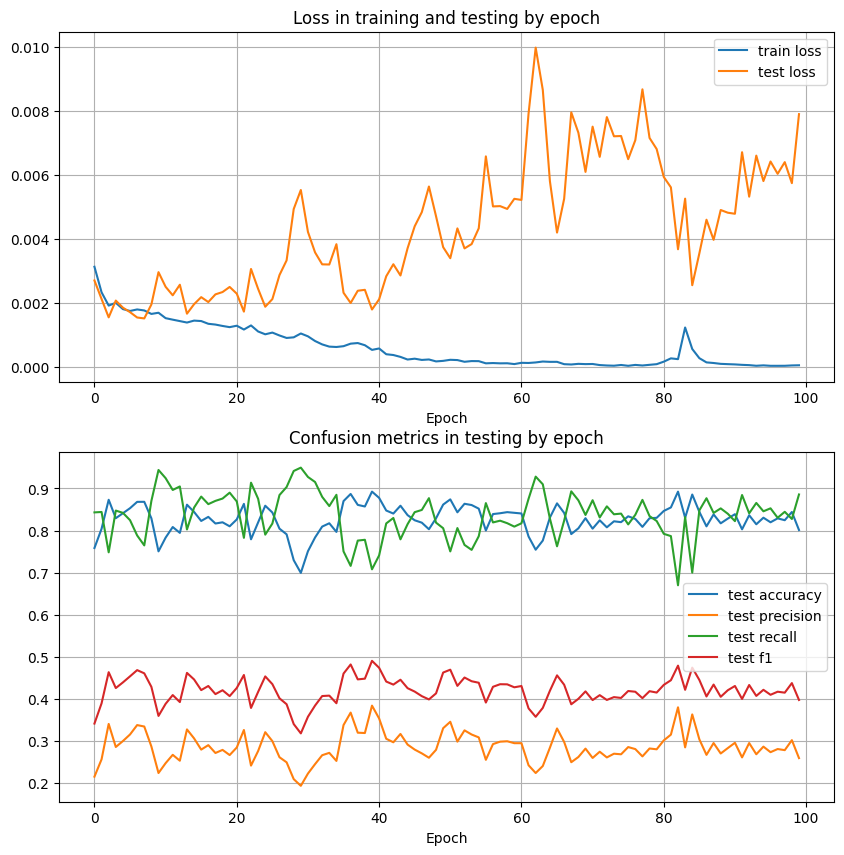

In [5]:

print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1", "mcc"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)

In [6]:
torch.save(model, "model.pth")